In [1]:
import scanpy as sc
import os
import anndata
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from scanpy.metrics.specificity.plot import marker_genes_distribution, one_v_max_genelist
import numpy as np
from scanpy.metrics.specificity.get_data import get_average_celltype_counts


Load data

In [2]:
DATA_PATH = r'data/'

In [3]:
count_file = 'HCA_Barbry_Grch38_Raw_filter_Norm.h5ad'
adata = anndata.read_h5ad(DATA_PATH + count_file)

C:\Users\ipmc\.conda\envs\scanpypip\lib\site-packages\anndata\compat\__init__.py:158: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
C:\Users\ipmc\.conda\envs\scanpypip\lib\site-packages\anndata\compat\__init__.py:158: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [4]:
adata.obs['CellType'].cat.categories

Index(['AT1', 'AT2', 'B cells', 'Basal', 'Brush cells', 'Cycling Basal',
       'Dendritic', 'Deuterosomal', 'Endothelial', 'Fibroblast', 'Ionocyte',
       'LT/NK', 'Macrophage', 'Mast cells', 'Monocyte', 'Multiciliated',
       'Multiciliated N', 'PNEC', 'Pericyte', 'Plasma cells', 'Precursor',
       'SMG Goblet', 'Secretory', 'Secretory N', 'Serous', 'Smooth muscle',
       'Suprabasal', 'Suprabasal N'],
      dtype='object')

In [5]:
specs = pd.read_csv(DATA_PATH + 'genes_spec_pred_V1', index_col = 'gene')

Choose your Markers

In [6]:
marker_file = 'MarkerCells_Christophe.csv'
markers = pd.read_csv(DATA_PATH + marker_file, sep=';')
celltypes = markers.columns

In [7]:
marker_file = 'Marker_Deprez_V2.csv'
markers = pd.read_csv(DATA_PATH + marker_file, sep=';')
celltypes = markers.columns

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 4: invalid start byte

In [8]:
marker_file = 'Markers_Meyer_CT_Deprez.csv'
markers = pd.read_csv(DATA_PATH + marker_file, sep=';')
celltypes = markers.columns

In [9]:
markers = list(adata.var.index)

Visualization - celltype

In [11]:
dropdown_celltype = widgets.Dropdown(
    options=celltypes,
    value='Basal',
    description='CellType:',
    disabled=False,
)

In [12]:
output_marker = widgets.Output()

In [13]:
def show_spec_distrib(change):
    output_marker.clear_output()
    with output_marker :
        spec_markers=markers[change.new].dropna()
        found_markers=spec_markers[spec_markers.isin(adata.var_names)]
        not_found=spec_markers[~spec_markers.isin(adata.var_names)]
        if not not_found.empty:
            print('Gene(s) not found : ' + ','.join(not_found))
        print(specs.loc[found_markers,'spe_type'])
        marker_genes_distribution(adata=adata,
                                  gene_list=spec_markers,
                                  celltype=change.new,
                                  partition_key='CellType')
        one_v_max_genelist(adata=adata,
                           gene_list=spec_markers,
                           partition_key='CellType')
        sc.pl.umap(adata=adata, color=found_markers, color_map = 'jet')

In [14]:
dropdown_celltype.observe(show_spec_distrib,names='value')
display(dropdown_celltype)

Dropdown(description='CellType:', index=17, options=('Macrophage', 'LT_NK', 'Monocyte', 'Neuroendocrine', 'Mes…

In [15]:
display(output_marker)

Output()

Vizualisation - genes

In [16]:
def find_max_celltype(gene,adata,partition_key="CellType"):
    get_average_celltype_counts(adata , partition_key = partition_key)
    gene_index = int(np.where(adata.var.index == gene)[0])
    max_celltype_index = np.argmax(adata.varm['ave_celltype_counts_CellType'][gene_index,:])
    max_celltype = list(adata.obs['CellType'].cat.categories)[max_celltype_index]
    return(max_celltype)

In [17]:
combobox_genes = widgets.Combobox(
    options=list(adata.var.index),
    placeholder='Type a gene',
    description='Gene:',
    ensure_option=True,
    disabled=False,
)

In [18]:
output_gene=widgets.Output()

In [19]:
def show_spec_gene(change):
    output_gene.clear_output()
    with output_gene :
        max_celltype = find_max_celltype(gene=change.new,adata=adata,partition_key="CellType")
        
        print('Specificity type : ' + str(specs.loc[change.new,'spe_type']) )
        marker_genes_distribution(adata=adata,
                                  gene_list=[change.new],
                                  celltype=max_celltype,
                                  partition_key='CellType')
        one_v_max_genelist(adata=adata,
                           gene_list=[change.new],
                           partition_key='CellType')
        sc.pl.umap(adata=adata, color=change.new, color_map = 'jet')

In [20]:
combobox_genes.observe(show_spec_gene,names='value')
display(combobox_genes)

Combobox(value='', description='Gene:', ensure_option=True, options=('AL669831.5', 'LINC00115', 'FAM41C', 'NOC…

In [21]:
display(output_gene)

Output()

In [ ]:
equirep low multirep high unique

In [ ]:
all = pd.read_csv('All_in_Meyer.csv',index_col=0)

In [ ]:
all = all.join(specs).dropna()

In [44]:
all.to_csv('All_in_All.csv')

AnnData object with n_obs × n_vars = 77969 × 14349
    obs: 'batch', 'donor', 'manip', 'method', 'position', 'CellType', 'Sex', 'Age'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'shannon_CellType', 'tau_CellType', 'gini_CellType'
    uns: 'CellType_colors', 'donor_colors', 'manip_colors', 'method_colors', 'neighbors', 'pca', 'position_colors', 'rank_genes_groups', 'umap', 'ave_celltype_index_CellType', 'ovm_CellType'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'pca_uncorrected', 'tsne_hg19', 'umap_hg19', 'umap_uncorrected', 'umap_uncorrected_hg19'
    varm: 'PCs', 'ave_celltype_counts_CellType'
    obsp: 'distances', 'connectivities'

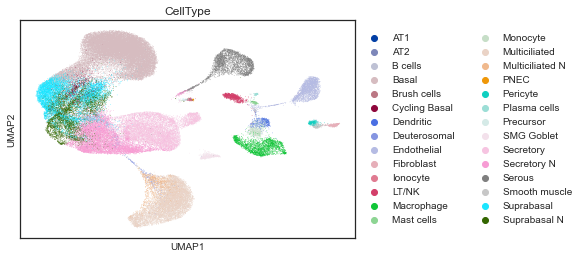